In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)

crash2 = pd.read_csv('Crash_v1.csv')
crash2.head()

,Report Number,ACRS Report Type,Crash Date/Time,Cross-Street Type,Driver At Fault,Injury Severity,Speed Limit,Parked Vehicle,Vehicle Year,Latitude,Longitude,Location,Collision,Turn,Light Conditions,Substance,Distraction,Conditions,Movement,Body,Traffic Signs,First Impact,Second Impact
0,MCP2723000R,Injury Crash,07/28/2015 08:49:00 AM,County,No,NO APPARENT INJURY,40,No,2011,39.120289,-77.040446,"(39.12028892, -77.0404458)",Head-On Collision,No Turn,Daylight,None Detected,Not Distracted,DRY,Travelling Forward,Car,No controls,Rear,Rear
1,MCP2723000R,Injury Crash,07/28/2015 08:49:00 AM,County,No,POSSIBLE INJURY,40,No,2011,39.120289,-77.040446,"(39.12028892, -77.0404458)",Head-On Collision,No Turn,Daylight,None Detected,Not Distracted,DRY,Travelling Forward,Car,No controls,Left,Left
2,MCP2723000R,Injury Crash,07/28/2015 08:49:00 AM,County,No,NO APPARENT INJURY,40,No,2010,39.120289,-77.040446,"(39.12028892, -77.0404458)",Head-On Collision,No Turn,Daylight,None Detected,Not Distracted,DRY,Travelling Forward,Car,No controls,Left,Left
3,MCP2723000R,Injury Crash,07/28/2015 08:49:00 AM,County,Yes,NO APPARENT INJURY,40,No,1999,39.120289,-77.040446,"(39.12028892, -77.0404458)",Head-On Collision,No Turn,Daylight,None Detected,Unknown,DRY,Travelling Forward,Car,No controls,Front,Front
4,DD55980013,Property Damage Crash,11/18/2016 06:39:00 PM,Municipality,No,NO APPARENT INJURY,25,No,2012,39.084540,-77.136742,"(39.08454, -77.13674167)",Other,No Turn,Dark,None Detected,Not Distracted,WIND,Stationary,Car,Traffic Signal/Lights,Front,Front


In [2]:
crash2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172105 entries, 0 to 172104
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Report Number      172105 non-null  object 
 1   ACRS Report Type   172105 non-null  object 
 2   Crash Date/Time    172105 non-null  object 
 3   Cross-Street Type  172105 non-null  object 
 4   Driver At Fault    172105 non-null  object 
 5   Injury Severity    172105 non-null  object 
 6   Speed Limit        172105 non-null  int64  
 7   Parked Vehicle     172105 non-null  object 
 8   Vehicle Year       172105 non-null  int64  
 9   Latitude           172105 non-null  float64
 10  Longitude          172105 non-null  float64
 11  Location           172105 non-null  object 
 12  Collision          172105 non-null  object 
 13  Turn               172105 non-null  object 
 14  Light Conditions   172105 non-null  object 
 15  Substance          172105 non-null  object 
 16  Di

In [3]:
crash2['Injury Severity'].value_counts()

NO APPARENT INJURY          141185
POSSIBLE INJURY              17482
SUSPECTED MINOR INJURY       11870
SUSPECTED SERIOUS INJURY      1415
FATAL INJURY                   153
Name: Injury Severity, dtype: int64

# DateTime Transformations

In [4]:
crash2['Crash Date/Time'] = pd.to_datetime(crash2['Crash Date/Time'], errors='coerce')
                                                  
# Sort the DataFrame by Crash Date/Time
crash2 = crash2.sort_values(by='Crash Date/Time')

# Create a column to count incidents
crash2['incident_count'] = 1

# Set the Crash Date/Time column as the index
crash2.set_index('Crash Date/Time', inplace=True)

# Create a rolling window to count incidents in the last hour
crash2['Vehicles in Crashes Last Hour'] = crash2['incident_count'].rolling('1H').sum().shift(1).fillna(0)

# Reset index to have Crash Date/Time as a column again
crash2.reset_index(inplace=True)

# Drop the incident_count column as it was just an intermediate step
crash2.drop(columns=['incident_count'], inplace=True)

crash2['Vehicles in Crashes Last Hour'] = crash2['Vehicles in Crashes Last Hour'].astype('int')

# Check
crash2.head()

,Crash Date/Time,Report Number,ACRS Report Type,Cross-Street Type,Driver At Fault,Injury Severity,Speed Limit,Parked Vehicle,Vehicle Year,Latitude,Longitude,Location,Collision,Turn,Light Conditions,Substance,Distraction,Conditions,Movement,Body,Traffic Signs,First Impact,Second Impact,Vehicles in Crashes Last Hour
0,2015-01-01 00:30:00,MCP11520005,Property Damage Crash,County,Yes,NO APPARENT INJURY,35,No,2008,39.022001,-77.102673,"(39.02200107, -77.10267305)",Same Direction,No Turn,Dark,Alcohol,Distracted,DRY,Slowing,SUV,Traffic Signal/Lights,Front,Front,0
1,2015-01-01 00:30:00,MCP11520005,Property Damage Crash,County,No,NO APPARENT INJURY,35,No,1993,39.022001,-77.102673,"(39.02200107, -77.10267305)",Same Direction,No Turn,Dark,None Detected,Not Distracted,DRY,Stationary,Car,Traffic Signal/Lights,Rear,Rear,1
2,2015-01-01 01:10:00,MCP2686000D,Property Damage Crash,County,No,NO APPARENT INJURY,40,No,2007,39.196610,-77.265547,"(39.19661, -77.26554667)",Same Direction,No Turn,Dark,None Detected,Not Distracted,DRY,Turning,SUV,Traffic Signal/Lights,Rear,Rear,2
3,2015-01-01 01:10:00,MCP2686000D,Property Damage Crash,County,Yes,NO APPARENT INJURY,40,No,2010,39.196610,-77.265547,"(39.19661, -77.26554667)",Same Direction,No Turn,Dark,Alcohol,Not Distracted,DRY,Slowing,Car,Traffic Signal/Lights,Front,Front,3
4,2015-01-01 01:14:00,MCP2783000G,Injury Crash,County,No,SUSPECTED MINOR INJURY,40,No,2002,39.096217,-77.109803,"(39.09621667, -77.10980333)",Head-On Collision,No Turn,Dark,None Detected,Not Distracted,DRY,Travelling Forward,Car,Traffic Signal/Lights,Front,Front,4


In [5]:
# Extract relevant time series features
crash2['Crash Year'] = crash2['Crash Date/Time'].dt.year
crash2['Crash Quarter'] = crash2['Crash Date/Time'].dt.quarter
crash2['Crash Month'] = crash2['Crash Date/Time'].dt.month
crash2['Crash DayOfWeek'] = crash2['Crash Date/Time'].dt.dayofweek
crash2['Crash Hour'] = crash2['Crash Date/Time'].dt.hour

In [6]:
# Format the datetime column to display only the time part
crash2['Crash Time'] = crash2['Crash Date/Time'].dt.strftime('%H:%M')

In [7]:
crash2.head()

,Crash Date/Time,Report Number,ACRS Report Type,Cross-Street Type,Driver At Fault,Injury Severity,Speed Limit,Parked Vehicle,Vehicle Year,Latitude,Longitude,Location,Collision,Turn,Light Conditions,Substance,Distraction,Conditions,Movement,Body,Traffic Signs,First Impact,Second Impact,Vehicles in Crashes Last Hour,Crash Year,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Crash Time
0,2015-01-01 00:30:00,MCP11520005,Property Damage Crash,County,Yes,NO APPARENT INJURY,35,No,2008,39.022001,-77.102673,"(39.02200107, -77.10267305)",Same Direction,No Turn,Dark,Alcohol,Distracted,DRY,Slowing,SUV,Traffic Signal/Lights,Front,Front,0,2015,1,1,3,0,00:30
1,2015-01-01 00:30:00,MCP11520005,Property Damage Crash,County,No,NO APPARENT INJURY,35,No,1993,39.022001,-77.102673,"(39.02200107, -77.10267305)",Same Direction,No Turn,Dark,None Detected,Not Distracted,DRY,Stationary,Car,Traffic Signal/Lights,Rear,Rear,1,2015,1,1,3,0,00:30
2,2015-01-01 01:10:00,MCP2686000D,Property Damage Crash,County,No,NO APPARENT INJURY,40,No,2007,39.196610,-77.265547,"(39.19661, -77.26554667)",Same Direction,No Turn,Dark,None Detected,Not Distracted,DRY,Turning,SUV,Traffic Signal/Lights,Rear,Rear,2,2015,1,1,3,1,01:10
3,2015-01-01 01:10:00,MCP2686000D,Property Damage Crash,County,Yes,NO APPARENT INJURY,40,No,2010,39.196610,-77.265547,"(39.19661, -77.26554667)",Same Direction,No Turn,Dark,Alcohol,Not Distracted,DRY,Slowing,Car,Traffic Signal/Lights,Front,Front,3,2015,1,1,3,1,01:10
4,2015-01-01 01:14:00,MCP2783000G,Injury Crash,County,No,SUSPECTED MINOR INJURY,40,No,2002,39.096217,-77.109803,"(39.09621667, -77.10980333)",Head-On Collision,No Turn,Dark,None Detected,Not Distracted,DRY,Travelling Forward,Car,Traffic Signal/Lights,Front,Front,4,2015,1,1,3,1,01:14


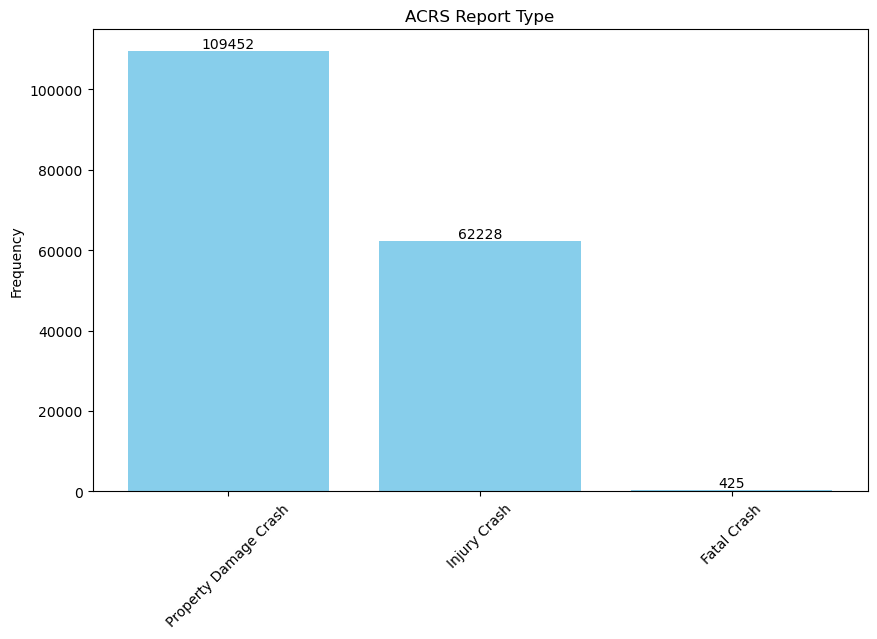

In [8]:
import matplotlib.pyplot as plt

report_type_counts = crash2['ACRS Report Type'].value_counts()

# Plot the histogram as a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(report_type_counts.index, report_type_counts.values, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.ylabel('Frequency')
plt.title('ACRS Report Type')
plt.xticks(rotation=45)
plt.show()

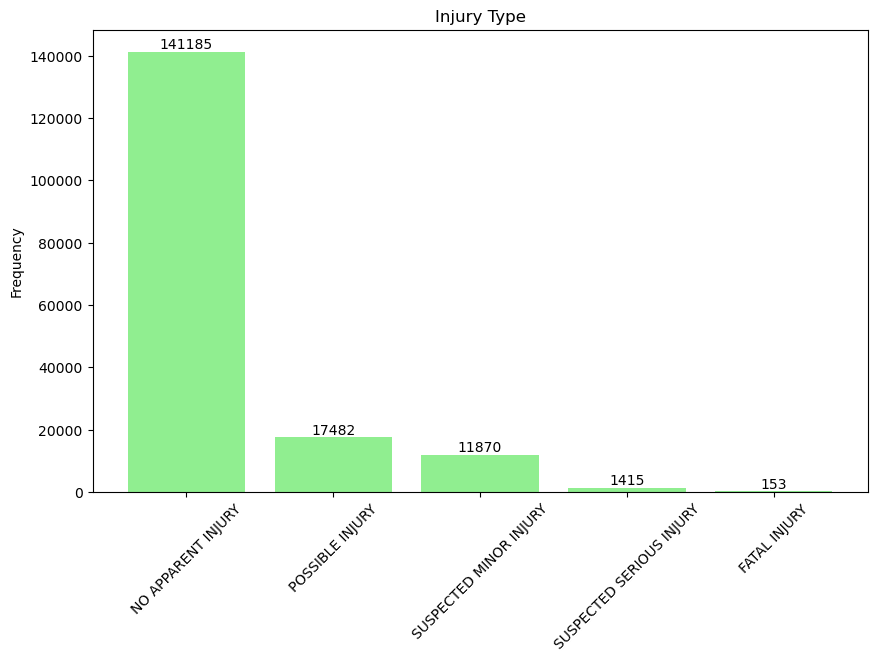

In [9]:
injury_type_counts = crash2['Injury Severity'].value_counts()

# Plot the histogram as a bar plot
plt.figure(figsize=(10, 6))
bars2 = plt.bar(injury_type_counts.index, injury_type_counts.values, color='lightgreen')

# Add value labels on top of each bar
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.ylabel('Frequency')
plt.title('Injury Type')
plt.xticks(rotation=45)
plt.show()

In [10]:
import holidays

us_holidays = holidays.US()

crash2['Is Holiday'] = crash2['Crash Date/Time'].dt.date.apply(lambda x: 1 if x in us_holidays else 0)
crash2['Is Peak Hour'] = crash2['Crash Hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 18) else 0)
crash2['Is Weekend'] = crash2['Crash DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

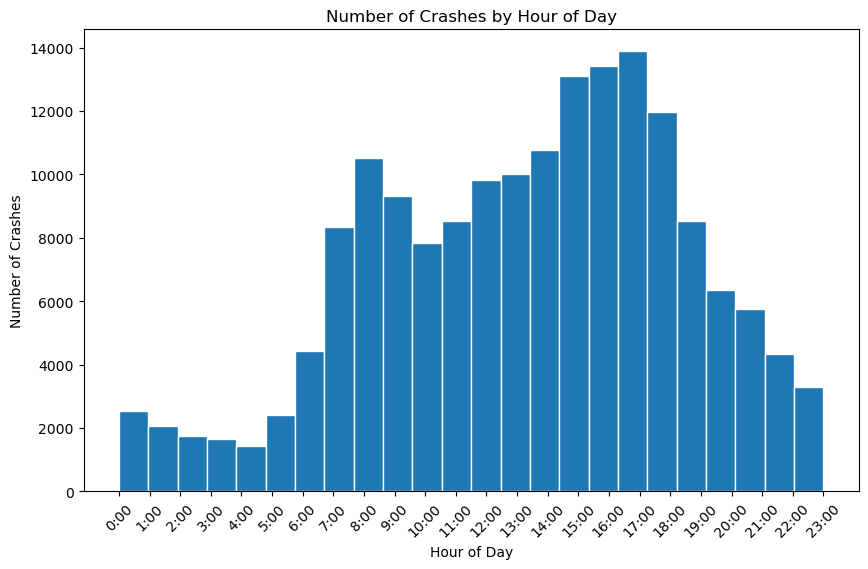

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(crash2['Crash Hour'].dropna(), bins=24, edgecolor='white')
plt.title('Number of Crashes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')

hours = [f'{i}:00' for i in range(24)]
plt.xticks(range(24), hours, rotation=45) 

plt.show()

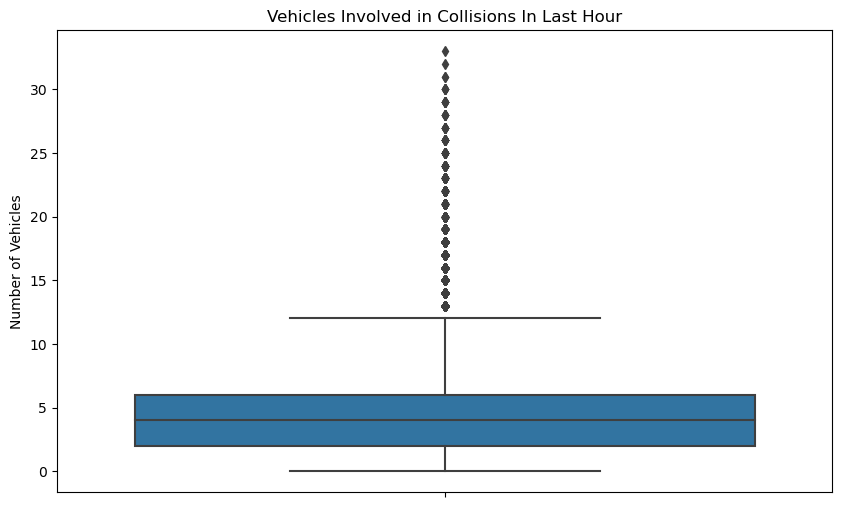

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y=crash2['Vehicles in Crashes Last Hour'])
plt.title('Vehicles Involved in Collisions In Last Hour')
plt.ylabel('Number of Vehicles')
plt.show()

In [13]:
crash2['Vehicles in Crashes Last Hour'].describe()

count    172105.000000
mean          4.812458
std           3.295170
min           0.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          33.000000
Name: Vehicles in Crashes Last Hour, dtype: float64

In [14]:
crash2['Vehicles in Crashes Last Hour'].median()

4.0

# Calculate Distance From Holy Cross Germantown Hospital Emergency Room

In [15]:
from geopy.distance import geodesic

# Coordinates of Germantown, MD
germantown_coords = (39.209471508806864, -77.23978520922455)

# Function to calculate distance between two points
def calculate_distance(row):
    crash_coords = (row['Latitude'], row['Longitude'])
    return geodesic(germantown_coords, crash_coords).miles

# Add new column
crash2['Distance'] = crash2.apply(calculate_distance, axis=1)
crash2['Distance'] = round(crash2['Distance'],2)

# Calculate Number of vehicles involved in a single crash

In [16]:
crash2['Total Vehicles'] = crash2.groupby(['Crash Date/Time', 'Distance'])['Crash Date/Time'].transform('count')

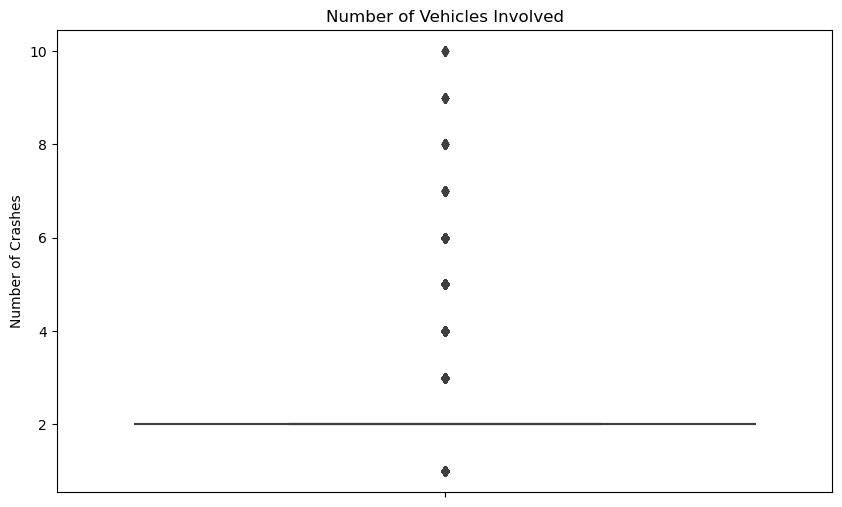

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=crash2['Total Vehicles'])
plt.title('Number of Vehicles Involved')
plt.ylabel('Number of Crashes')
plt.show()

In [18]:
crash2.head()

,Crash Date/Time,Report Number,ACRS Report Type,Cross-Street Type,Driver At Fault,Injury Severity,Speed Limit,Parked Vehicle,Vehicle Year,Latitude,Longitude,Location,Collision,Turn,Light Conditions,Substance,Distraction,Conditions,Movement,Body,Traffic Signs,First Impact,Second Impact,Vehicles in Crashes Last Hour,Crash Year,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Crash Time,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles
0,2015-01-01 00:30:00,MCP11520005,Property Damage Crash,County,Yes,NO APPARENT INJURY,35,No,2008,39.022001,-77.102673,"(39.02200107, -77.10267305)",Same Direction,No Turn,Dark,Alcohol,Distracted,DRY,Slowing,SUV,Traffic Signal/Lights,Front,Front,0,2015,1,1,3,0,00:30,1,0,0,14.88,2
1,2015-01-01 00:30:00,MCP11520005,Property Damage Crash,County,No,NO APPARENT INJURY,35,No,1993,39.022001,-77.102673,"(39.02200107, -77.10267305)",Same Direction,No Turn,Dark,None Detected,Not Distracted,DRY,Stationary,Car,Traffic Signal/Lights,Rear,Rear,1,2015,1,1,3,0,00:30,1,0,0,14.88,2
2,2015-01-01 01:10:00,MCP2686000D,Property Damage Crash,County,No,NO APPARENT INJURY,40,No,2007,39.196610,-77.265547,"(39.19661, -77.26554667)",Same Direction,No Turn,Dark,None Detected,Not Distracted,DRY,Turning,SUV,Traffic Signal/Lights,Rear,Rear,2,2015,1,1,3,1,01:10,1,0,0,1.64,2
3,2015-01-01 01:10:00,MCP2686000D,Property Damage Crash,County,Yes,NO APPARENT INJURY,40,No,2010,39.196610,-77.265547,"(39.19661, -77.26554667)",Same Direction,No Turn,Dark,Alcohol,Not Distracted,DRY,Slowing,Car,Traffic Signal/Lights,Front,Front,3,2015,1,1,3,1,01:10,1,0,0,1.64,2
4,2015-01-01 01:14:00,MCP2783000G,Injury Crash,County,No,SUSPECTED MINOR INJURY,40,No,2002,39.096217,-77.109803,"(39.09621667, -77.10980333)",Head-On Collision,No Turn,Dark,None Detected,Not Distracted,DRY,Travelling Forward,Car,Traffic Signal/Lights,Front,Front,4,2015,1,1,3,1,01:14,1,0,0,10.48,2


In [19]:
crash2['Vehicle Year'].describe()

count    172105.000000
mean       1966.306946
std         340.615468
min           0.000000
25%        2006.000000
50%        2011.000000
75%        2015.000000
max        9999.000000
Name: Vehicle Year, dtype: float64

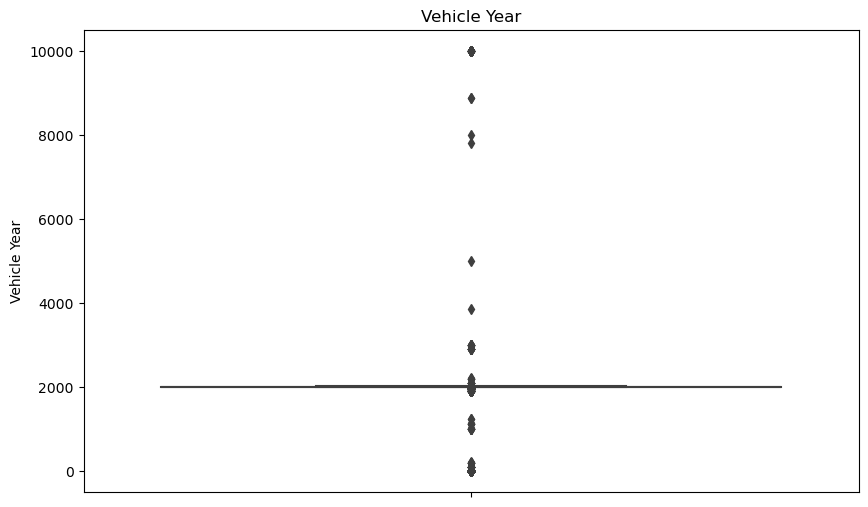

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=crash2['Vehicle Year'])
plt.title('Vehicle Year')
plt.show()

In [21]:
pd.set_option('display.max_rows', None)
crash2['Vehicle Year'].value_counts()

2015    11861
2014    11632
2016    11207
2013    10937
2012     9337
2017     9093
2011     8368
2007     7926
2008     7906
2010     7430
2006     7413
2009     6783
2018     6738
2005     6499
2004     6150
2019     5472
2003     5358
2002     4278
0        3995
2001     3482
2020     3475
2000     3263
2021     2584
1999     2182
2022     1663
1998     1636
1997     1279
1996      803
2023      733
1995      622
1994      439
1993      306
1992      198
1991      157
1990      149
1989      111
1988       90
2024       64
1900       64
1987       64
9999       59
1986       39
1985       33
99         26
1983       15
1984       12
1978       10
1982        9
1980        9
1969        5
1974        5
1972        4
1111        4
1981        4
1975        3
2033        3
2996        3
1901        3
1968        3
1966        3
1979        3
1970        3
15          3
2914        3
1014        2
1234        2
13          2
1976        2
2103        2
1965        2
8888        2
1955  

In [22]:
crash2.loc[crash2['Vehicle Year'] == 0, 'Vehicle Year'] = crash2['Crash Year']

In [23]:
crash2.loc[crash2['Vehicle Year'] == 99, 'Vehicle Year'] = 1999
crash2.loc[crash2['Vehicle Year'] == 15, 'Vehicle Year'] = 2015
crash2.loc[crash2['Vehicle Year'] == 13, 'Vehicle Year'] = 2013
crash2.loc[crash2['Vehicle Year'] == 200, 'Vehicle Year'] = 2000
crash2.loc[crash2['Vehicle Year'] == 201, 'Vehicle Year'] = 2001
crash2.loc[crash2['Vehicle Year'] == 9999, 'Vehicle Year'] = 1999
crash2.loc[crash2['Vehicle Year'] == 1900, 'Vehicle Year'] = 1990

In [24]:
for index, row in crash2.iterrows():
    if row['Vehicle Year'] < 10:
        crash2.at[index, 'Vehicle Year'] = row['Crash Date/Time'].year - row['Vehicle Year']

In [25]:
crash2.loc[crash2['Vehicle Year'] > crash2['Crash Year'], 'Vehicle Year'] = crash2['Vehicle Year'].mode()[0]

In [26]:
crash2.loc[crash2['Vehicle Year'] < 1990, 'Vehicle Year'] = crash2['Vehicle Year'].mode()[0]

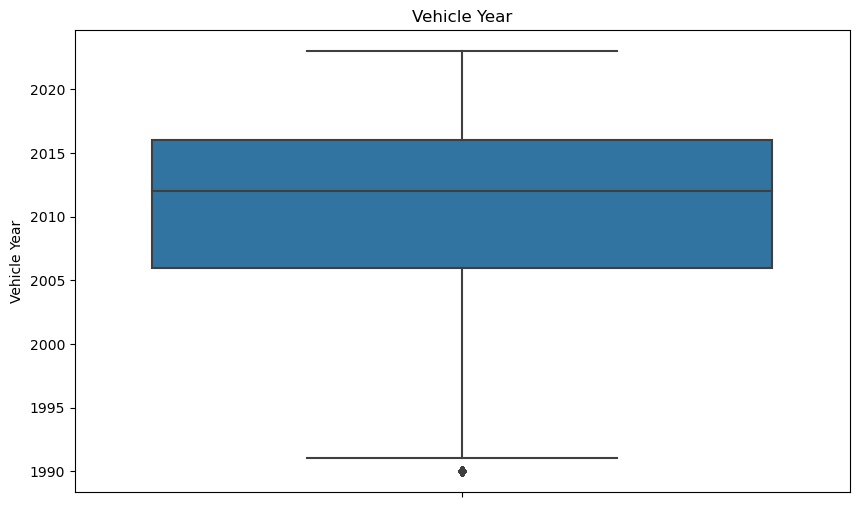

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=crash2['Vehicle Year'])
plt.title('Vehicle Year')
plt.show()

In [28]:
crash2.describe()

,Speed Limit,Vehicle Year,Latitude,Longitude,Vehicles in Crashes Last Hour,Crash Year,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles
count,172105.000000,172105.000000,172105.000000,172105.000000,172105.000000,172105.000000,172105.000000,172105.000000,172105.000000,172105.000000,172105.000000,172105.000000,172105.000000,172105.000000,172105.000000
mean,32.549752,2010.837797,39.083119,-77.112343,4.812458,2018.791075,2.573627,6.727509,2.824584,13.346416,0.022829,0.391987,0.229174,11.890098,2.010290
std,11.059987,6.280874,0.072032,0.098571,3.295170,2.596012,1.124210,3.469966,1.908919,5.264803,0.149359,0.488195,0.420303,5.849356,0.701285
min,0.000000,1990.000000,37.720000,-79.486000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,1.000000
25%,25.000000,2006.000000,39.024417,-77.189327,2.000000,2017.000000,2.000000,4.000000,1.000000,9.000000,0.000000,0.000000,0.000000,6.740000,2.000000
50%,35.000000,2012.000000,39.074933,-77.105412,4.000000,2019.000000,3.000000,7.000000,3.000000,14.000000,0.000000,0.000000,0.000000,12.870000,2.000000
75%,40.000000,2016.000000,39.139742,-77.039592,6.000000,2021.000000,4.000000,10.000000,4.000000,17.000000,0.000000,1.000000,0.000000,17.240000,2.000000
max,75.000000,2023.000000,39.990414,-75.527708,33.000000,2024.000000,4.000000,12.000000,6.000000,23.000000,1.000000,1.000000,1.000000,159.090000,10.000000


In [29]:
crash2.head()

,Crash Date/Time,Report Number,ACRS Report Type,Cross-Street Type,Driver At Fault,Injury Severity,Speed Limit,Parked Vehicle,Vehicle Year,Latitude,Longitude,Location,Collision,Turn,Light Conditions,Substance,Distraction,Conditions,Movement,Body,Traffic Signs,First Impact,Second Impact,Vehicles in Crashes Last Hour,Crash Year,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Crash Time,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles
0,2015-01-01 00:30:00,MCP11520005,Property Damage Crash,County,Yes,NO APPARENT INJURY,35,No,2008,39.022001,-77.102673,"(39.02200107, -77.10267305)",Same Direction,No Turn,Dark,Alcohol,Distracted,DRY,Slowing,SUV,Traffic Signal/Lights,Front,Front,0,2015,1,1,3,0,00:30,1,0,0,14.88,2
1,2015-01-01 00:30:00,MCP11520005,Property Damage Crash,County,No,NO APPARENT INJURY,35,No,1993,39.022001,-77.102673,"(39.02200107, -77.10267305)",Same Direction,No Turn,Dark,None Detected,Not Distracted,DRY,Stationary,Car,Traffic Signal/Lights,Rear,Rear,1,2015,1,1,3,0,00:30,1,0,0,14.88,2
2,2015-01-01 01:10:00,MCP2686000D,Property Damage Crash,County,No,NO APPARENT INJURY,40,No,2007,39.196610,-77.265547,"(39.19661, -77.26554667)",Same Direction,No Turn,Dark,None Detected,Not Distracted,DRY,Turning,SUV,Traffic Signal/Lights,Rear,Rear,2,2015,1,1,3,1,01:10,1,0,0,1.64,2
3,2015-01-01 01:10:00,MCP2686000D,Property Damage Crash,County,Yes,NO APPARENT INJURY,40,No,2010,39.196610,-77.265547,"(39.19661, -77.26554667)",Same Direction,No Turn,Dark,Alcohol,Not Distracted,DRY,Slowing,Car,Traffic Signal/Lights,Front,Front,3,2015,1,1,3,1,01:10,1,0,0,1.64,2
4,2015-01-01 01:14:00,MCP2783000G,Injury Crash,County,No,SUSPECTED MINOR INJURY,40,No,2002,39.096217,-77.109803,"(39.09621667, -77.10980333)",Head-On Collision,No Turn,Dark,None Detected,Not Distracted,DRY,Travelling Forward,Car,Traffic Signal/Lights,Front,Front,4,2015,1,1,3,1,01:14,1,0,0,10.48,2


In [34]:
import numpy as np 

# Define bins and labels
bins = [0, 5, 10, 15, 20, 50, np.inf]
labels = ["0-4 miles", "5-9 miles", "10-14 miles", "15-19 miles", "20-49 miles", "50+ miles"]

# Assign bins to a new column
crash2['Distance_Bin'] = pd.cut(crash2['Distance'], bins=bins, labels=labels, right=False)

# Display the DataFrame
crash2.head()

,Crash Date/Time,Report Number,ACRS Report Type,Cross-Street Type,Driver At Fault,Injury Severity,Speed Limit,Parked Vehicle,Vehicle Year,Latitude,Longitude,Location,Collision,Turn,Light Conditions,Substance,Distraction,Conditions,Movement,Body,Traffic Signs,First Impact,Second Impact,Vehicles in Crashes Last Hour,Crash Year,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Crash Time,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Distance_Bin
0,2015-01-01 00:30:00,MCP11520005,Property Damage Crash,County,Yes,NO APPARENT INJURY,35,No,2008,39.022001,-77.102673,"(39.02200107, -77.10267305)",Same Direction,No Turn,Dark,Alcohol,Distracted,DRY,Slowing,SUV,Traffic Signal/Lights,Front,Front,0,2015,1,1,3,0,00:30,1,0,0,14.88,2,10-14 miles
1,2015-01-01 00:30:00,MCP11520005,Property Damage Crash,County,No,NO APPARENT INJURY,35,No,1993,39.022001,-77.102673,"(39.02200107, -77.10267305)",Same Direction,No Turn,Dark,None Detected,Not Distracted,DRY,Stationary,Car,Traffic Signal/Lights,Rear,Rear,1,2015,1,1,3,0,00:30,1,0,0,14.88,2,10-14 miles
2,2015-01-01 01:10:00,MCP2686000D,Property Damage Crash,County,No,NO APPARENT INJURY,40,No,2007,39.196610,-77.265547,"(39.19661, -77.26554667)",Same Direction,No Turn,Dark,None Detected,Not Distracted,DRY,Turning,SUV,Traffic Signal/Lights,Rear,Rear,2,2015,1,1,3,1,01:10,1,0,0,1.64,2,0-4 miles
3,2015-01-01 01:10:00,MCP2686000D,Property Damage Crash,County,Yes,NO APPARENT INJURY,40,No,2010,39.196610,-77.265547,"(39.19661, -77.26554667)",Same Direction,No Turn,Dark,Alcohol,Not Distracted,DRY,Slowing,Car,Traffic Signal/Lights,Front,Front,3,2015,1,1,3,1,01:10,1,0,0,1.64,2,0-4 miles
4,2015-01-01 01:14:00,MCP2783000G,Injury Crash,County,No,SUSPECTED MINOR INJURY,40,No,2002,39.096217,-77.109803,"(39.09621667, -77.10980333)",Head-On Collision,No Turn,Dark,None Detected,Not Distracted,DRY,Travelling Forward,Car,Traffic Signal/Lights,Front,Front,4,2015,1,1,3,1,01:14,1,0,0,10.48,2,10-14 miles


In [35]:
crash2['Distance_Bin'].value_counts()

15-19 miles    61316
10-14 miles    45928
5-9 miles      31457
0-4 miles      30375
20-49 miles     2983
50+ miles         46
Name: Distance_Bin, dtype: int64

In [ ]:
crash2.to_csv('crash_v2.csv', index=False)

In [36]:
crash2 = pd.read_csv('crash_v2.csv')

# Creating a mapping for Injury Severity to numeric values
severity_mapping = {
    'NO APPARENT INJURY': 0,
    'POSSIBLE INJURY': 1,
    'SUSPECTED MINOR INJURY': 2,
    'SUSPECTED SERIOUS INJURY': 3,
    'FATAL INJURY': 4
}

# Create a new numeric column for Injury Severity
crash2['Injury_Target'] = crash2['Injury Severity'].map(severity_mapping)

In [37]:
crash2.head()

,Crash Date/Time,Report Number,ACRS Report Type,Cross-Street Type,Driver At Fault,Injury Severity,Speed Limit,Parked Vehicle,Vehicle Year,Latitude,Longitude,Location,Collision,Turn,Light Conditions,Substance,Distraction,Conditions,Movement,Body,Traffic Signs,First Impact,Second Impact,Vehicles in Crashes Last Hour,Crash Year,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Crash Time,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Distance_Bin,Injury_Target
0,2015-01-01 00:30:00,MCP11520005,Property Damage Crash,County,Yes,NO APPARENT INJURY,35,No,2008,39.022001,-77.102673,"(39.02200107, -77.10267305)",Same Direction,No Turn,Dark,Alcohol,Distracted,DRY,Slowing,SUV,Traffic Signal/Lights,Front,Front,0,2015,1,1,3,0,00:30,1,0,0,14.88,2,10-14 miles,0
1,2015-01-01 00:30:00,MCP11520005,Property Damage Crash,County,No,NO APPARENT INJURY,35,No,1993,39.022001,-77.102673,"(39.02200107, -77.10267305)",Same Direction,No Turn,Dark,None Detected,Not Distracted,DRY,Stationary,Car,Traffic Signal/Lights,Rear,Rear,1,2015,1,1,3,0,00:30,1,0,0,14.88,2,10-14 miles,0
2,2015-01-01 01:10:00,MCP2686000D,Property Damage Crash,County,No,NO APPARENT INJURY,40,No,2007,39.196610,-77.265547,"(39.19661, -77.26554667)",Same Direction,No Turn,Dark,None Detected,Not Distracted,DRY,Turning,SUV,Traffic Signal/Lights,Rear,Rear,2,2015,1,1,3,1,01:10,1,0,0,1.64,2,0-4 miles,0
3,2015-01-01 01:10:00,MCP2686000D,Property Damage Crash,County,Yes,NO APPARENT INJURY,40,No,2010,39.196610,-77.265547,"(39.19661, -77.26554667)",Same Direction,No Turn,Dark,Alcohol,Not Distracted,DRY,Slowing,Car,Traffic Signal/Lights,Front,Front,3,2015,1,1,3,1,01:10,1,0,0,1.64,2,0-4 miles,0
4,2015-01-01 01:14:00,MCP2783000G,Injury Crash,County,No,SUSPECTED MINOR INJURY,40,No,2002,39.096217,-77.109803,"(39.09621667, -77.10980333)",Head-On Collision,No Turn,Dark,None Detected,Not Distracted,DRY,Travelling Forward,Car,Traffic Signal/Lights,Front,Front,4,2015,1,1,3,1,01:14,1,0,0,10.48,2,10-14 miles,2


In [38]:
crash2['Distance_Bin'].value_counts()

15-19 miles    61316
10-14 miles    45928
5-9 miles      31457
0-4 miles      30375
20-49 miles     2983
50+ miles         46
Name: Distance_Bin, dtype: int64

In [39]:
crash2.to_csv('crash_v2.csv', index=False)

In [40]:
columns_to_drop_v4 = [
   'Cross-Street Type', 
    'Driver At Fault', 
    'Parked Vehicle', 
    'Collision', 
    'Turn', 
    'Light Conditions',     
    'Substance', 
    'Distraction', 
    'Conditions', 
    'Movement', 
    'Body',
    'Traffic Signs', 
    'First Impact',
    'Second Impact',
    'Report Number',
    'Location',
    'Second Impact'
]
crash_ready_for_dummies = crash2.drop(columns=columns_to_drop_v4)

In [41]:
crash_ready_for_dummies.head()

,Crash Date/Time,ACRS Report Type,Injury Severity,Speed Limit,Vehicle Year,Latitude,Longitude,Vehicles in Crashes Last Hour,Crash Year,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Crash Time,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Distance_Bin,Injury_Target
0,2015-01-01 00:30:00,Property Damage Crash,NO APPARENT INJURY,35,2008,39.022001,-77.102673,0,2015,1,1,3,0,00:30,1,0,0,14.88,2,10-14 miles,0
1,2015-01-01 00:30:00,Property Damage Crash,NO APPARENT INJURY,35,1993,39.022001,-77.102673,1,2015,1,1,3,0,00:30,1,0,0,14.88,2,10-14 miles,0
2,2015-01-01 01:10:00,Property Damage Crash,NO APPARENT INJURY,40,2007,39.196610,-77.265547,2,2015,1,1,3,1,01:10,1,0,0,1.64,2,0-4 miles,0
3,2015-01-01 01:10:00,Property Damage Crash,NO APPARENT INJURY,40,2010,39.196610,-77.265547,3,2015,1,1,3,1,01:10,1,0,0,1.64,2,0-4 miles,0
4,2015-01-01 01:14:00,Injury Crash,SUSPECTED MINOR INJURY,40,2002,39.096217,-77.109803,4,2015,1,1,3,1,01:14,1,0,0,10.48,2,10-14 miles,2


In [42]:
crash_ready_for_dummies.to_csv('crash_ready_for_dummies.csv', index=False)